In [57]:
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from python_speech_features import mfcc, logfbank
import librosa

In [132]:
def plot_signals(signals):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Time Series', size=16)
    i = 0
    for y in range(2):
        axes[y].set_title(list(signals.keys())[i])
        axes[y].plot(list(signals.values())[i])
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1

In [137]:
def plot_fft(fft):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Fourier Transforms', size=16)
    i = 0
    for y in range(2):
        data = list(fft.values())[i]
        Y, freq = data[0], data[1]
        axes[y].set_title(list(fft.keys())[i])
        axes[y].plot(freq, Y)
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1

In [136]:
def plot_fbank(fbank):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Filter Bank Coefficients', size=16)
    i = 0
    for y in range(2):
        axes[y].set_title(list(fbank.keys())[i])
        axes[y].imshow(list(fbank.values())[i],
                    cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1

In [135]:
def plot_mfccs(mfccs):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False,
                             sharey=True, figsize=(20,5))
    fig.suptitle('Mel Frequency Cepstrum Coefficients', size=16)
    i = 0
    for y in range(2):
        axes[y].set_title(list(mfccs.keys())[i])
        axes[y].imshow(list(mfccs.values())[i],
                    cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i += 1

In [134]:
def plot_fbank(fbanks):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, 
                         sharey=True, figsize=(20, 5))
    fig.suptitle('Filter Bank Coefficients', size=16, y=1.02)
    i = 0
    for y in range(2):
        axes[y].set_title(list(fbanks.keys())[i])
        axes[y].imshow(list(fbanks.values())[i],
                        cmap='hot', interpolation='nearest')
        axes[y].get_xaxis().set_visible(False)
        axes[y].get_yaxis().set_visible(False)
        i+=1

In [160]:
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y.sum(axis=1))/n)
    return (Y,freq)

In [114]:
def envelope(y, rate, threshold):
    mask = []
    y = pd.Series(y.sum(axis=1)).apply(np.abs)
    y_mean = y.rolling(window=int(rate/10), min_periods=1, center=True).mean()
    for mean in y_mean:
        if mean > threshold:
            mask.append(True)
        else:
            mask.append(False)
    return mask

In [36]:
df = pd.read_csv('sounds.csv', header=None)

In [39]:
df.set_index('fname', inplace=True)

In [38]:
df.rename(columns={0: "fname", 1: "label"}, inplace=True)

In [40]:
for f in df.index:
    rate, signal = wavfile.read('wavfiles/'+f)
    df.at[f, 'length'] = signal.shape[0]/rate

In [41]:
df.head()

,label,length
fname,,
00_000.wav,rain,10.0
00_001.wav,rain,10.0
00_002.wav,rain,10.0
00_003.wav,rain,10.0
00_004.wav,rain,10.0


In [42]:
classes = list(np.unique(df.label))
class_dist = df.groupby(['label'])['length'].mean()

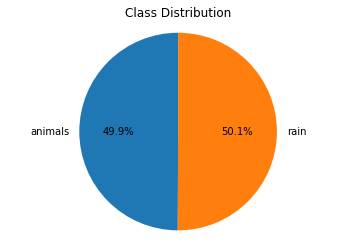

In [47]:
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.)
ax.pie(class_dist, labels=class_dist.index, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')
plt.show()
df.reset_index(inplace=True)

In [50]:
df[df.label=='rain'].iloc[0,2]

'00_000.wav'

In [105]:
a = [[1,2],
    [3,4],
    [5,6]]
a = np.array(a)

In [113]:
signal.sum(axis=1)

array([-325, -354, -393, ..., -158, -175, -169])

In [161]:
signals = {}
fft = {}
mfccs = {}
fbank = {}
for c in classes:
    wav_file = df[df.label==c].iloc[1,2]
    rate, signal = wavfile.read('wavfiles/'+wav_file)
    mask = envelope(signal, rate, 20)
    signal = signal[mask]
    wavfile.write('samples/'+c+'.wav', rate, signal)
    
    signals[c] = signal
    fft[c] = calc_fft(signal, rate)
    signal = signal.astype(float)
    mel = mfcc(signal[:rate], samplerate=rate,
               numcep=64, nfilt=64, nfft=1103).T
    mfccs[c] = mel
    bank = logfbank(signal[:rate], rate,
                    nfilt=64, nfft=1103).T
    fbank[c] = bank

In [156]:
rate1, signal1 = wavfile.read('10da16fb.wav')

In [159]:
signal1.shape

(147294,)

In [125]:
list(signals.keys())[0]

'animals'

In [155]:
len(list(fft.values())[0][0])

328582

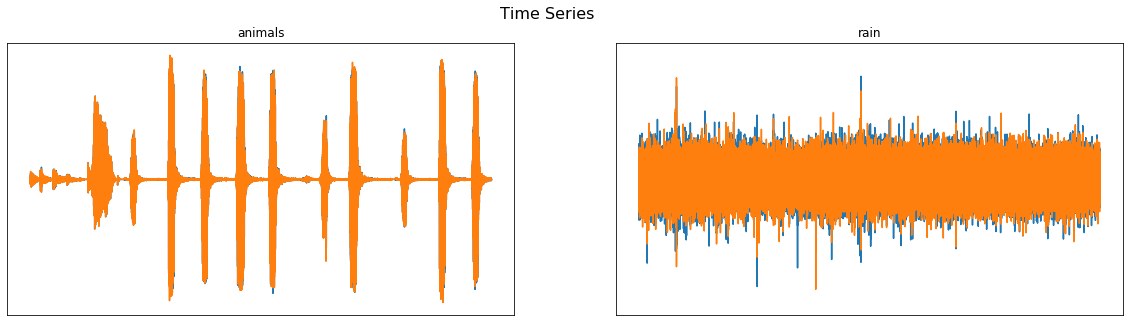

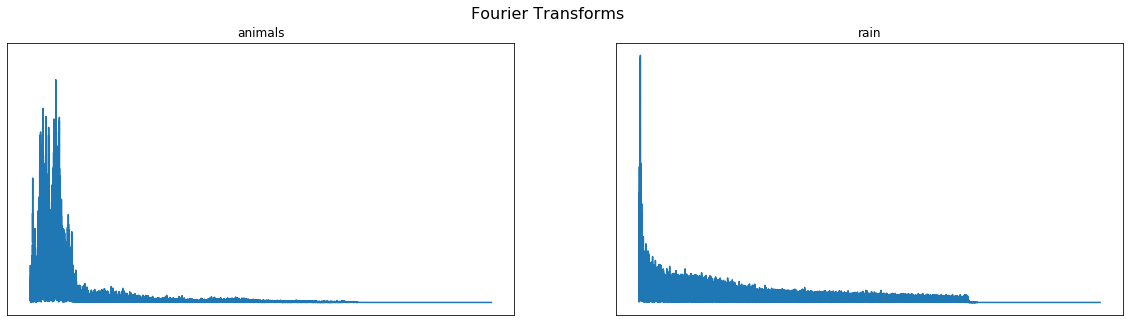

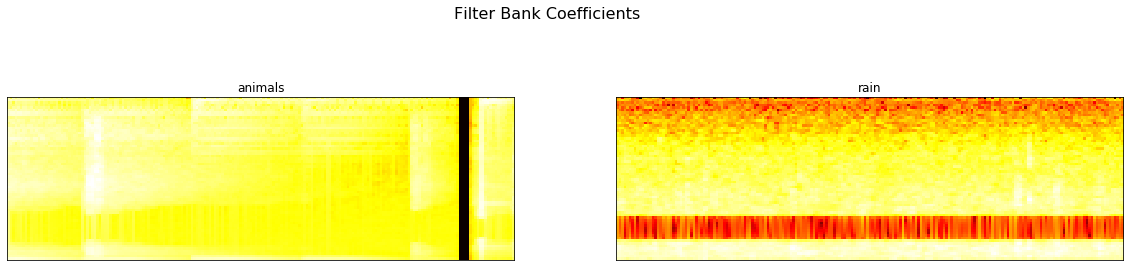

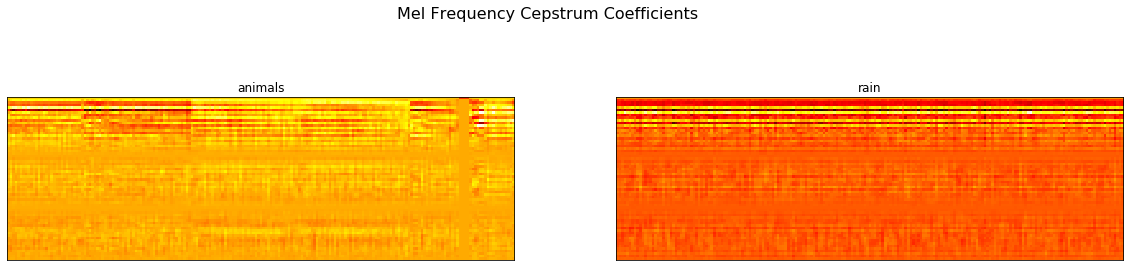

In [162]:
plot_signals(signals)
plt.show()

plot_fft(fft)
plt.show()

plot_fbank(fbank)
plt.show()

plot_mfccs(mfccs)
plt.show()

In [163]:
if len(os.listdir('clean')) == 0:
    for f in tqdm(df.fname):
        rate, signal = wavfile.read('wavfiles/'+f)
        mask = envelope(signal, rate, 20)
        wavfile.write('clean/'+f, rate, signal[mask])

100%|██████████| 242/242 [00:47<00:00,  5.32it/s]
